In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraudulent-transactions-data/Fraud.csv


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv("../input/fraudulent-transactions-data/Fraud.csv")
train,test=train_test_split(data,train_size=0.6,shuffle=False)
ytr=test.iloc[:,[9,10]]
yt=train.iloc[:,[9,10]]
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


         isFraud  isFlaggedFraud
0              0               0
1              0               0
2              1               0
3              1               0
4              0               0
...          ...             ...
3817567        0               0
3817568        0               0
3817569        0               0
3817570        0               0
3817571        0               0

[3817572 rows x 2 columns]


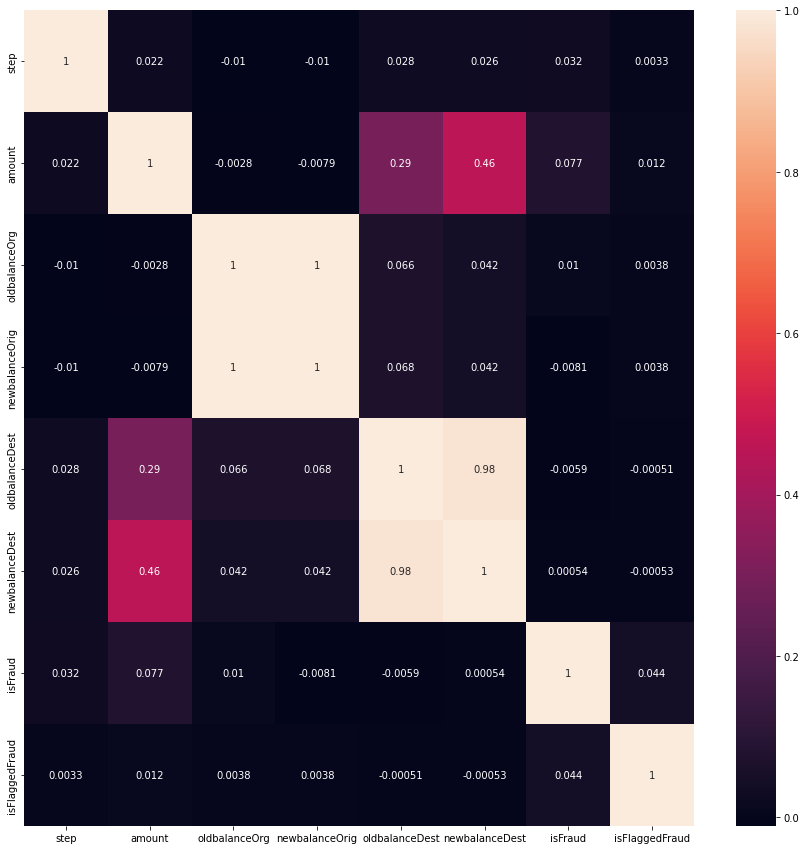

In [3]:
corr=data.corr()
print(yt)
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
model=KNN(n_neighbors=10)

t={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,"DEBIT":5}
train.type=[t[item] for item in train.type]
test.type=[t[item] for item in test.type]
train=train.drop(columns=["isFraud","isFlaggedFraud","nameOrig","nameDest"])
test=test.drop(columns=["isFraud","isFlaggedFraud","nameOrig","nameDest"])
y=[]

In [4]:
model.fit(train,yt)
y=model.predict(test)
print(y)
print(ytr)

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [1 0]
 [0 0]]
         isFraud  isFlaggedFraud
3817572        0               0
3817573        0               0
3817574        0               0
3817575        0               0
3817576        0               0
...          ...             ...
6362615        1               0
6362616        1               0
6362617        1               0
6362618        1               0
6362619        1               0

[2545048 rows x 2 columns]


In [5]:
from sklearn.metrics import accuracy_score as a
a(ytr,y)

0.999163080617733